In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets, neural_network
plt.rcParams['figure.figsize'] = [12, 4]

number of images -> 1797



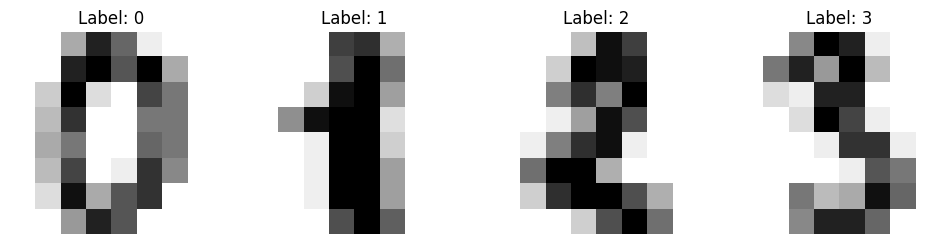

In [15]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
# load the digits dataset
digits = datasets.load_digits()
print(f"number of images -> {len(digits.images)}\n")
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images.
_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes, images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Label: %i' % label)

In [8]:
np.random.seed(0)
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
data = digits.images.reshape((len(digits.images), -1))

# create a small neural network classifier
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(alpha=1e-3)

# Split data into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

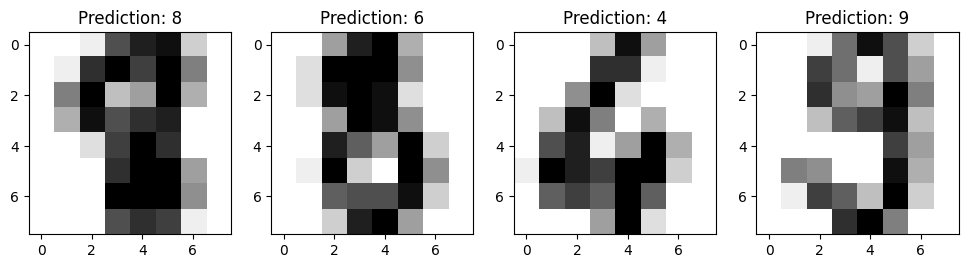

In [13]:
n_samples = len(digits.images)
_, axes = plt.subplots(1, 4)
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes, images_and_predictions[:4]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)